# Assignment - 3
*   Redg No : 24040208003
*   Name    : Guru Prasanth R S



# Data Analysis with pandas


In [ ]:
import pandas as pd
import numpy as np

Creating a Series

In [ ]:
river_lengths = pd.Series ([6300 , 6650 , 6275 , 6400])
river_lengths

,0
0,6300
1,6650
2,6275
3,6400


In [ ]:
river_lengths = pd.Series ([6300 , 6650 , 6275 , 6400] , name='Length /km',
dtype=float)
river_lengths

,Length /km
0,6300.0
1,6650.0
2,6275.0
3,6400.0


### Performing basic operation in pd.series

In [ ]:
river_lengths.index # to check the indexrange

RangeIndex(start=0, stop=4, step=1)

In [ ]:
river_lengths = pd.Series(data ={'Yangtze': 6300 , 'Nile': 6650 ,
                                 'Mississippi': 6275 , 'Amazon': 6400} ,name='Length /km')
river_lengths

,Length /km
Yangtze,6300
Nile,6650
Mississippi,6275
Amazon,6400


In [ ]:
river_lengths ['Nile']

6650

In [ ]:
river_lengths [['Amazon', 'Nile', 'Yangtze']]

,Length /km
Amazon,6400
Nile,6650
Yangtze,6300


In [ ]:
river_lengths [2:: -1]


,Length /km
Mississippi,6275
Nile,6650
Yangtze,6300


In [ ]:
river_lengths ['Nile':'Amazon']

,Length /km
Nile,6650
Mississippi,6275
Amazon,6400


In [ ]:
river_lengths > 4000 #Comparission

,Length /km
Yangtze,True
Nile,True
Mississippi,True
Amazon,True


In [ ]:
river_lengths [ river_lengths <= 4000]

,Length /km


In [ ]:
'Yangtze' in river_lengths

True

In [ ]:
river_lengths.sort_index()

,Length /km
Amazon,6400
Mississippi,6275
Nile,6650
Yangtze,6300


In [ ]:
river_lengths.sort_values(ascending=False,inplace=True)
river_lengths

,Length /km
Nile,6650
Amazon,6400
Yangtze,6300
Mississippi,6275


Two series are combined, they are aligned by index label. If there is no correspondence within the indexes, the result is “Not a Number” (NaN)

In [ ]:
masses = pd.Series ({'Ganymede': 1.482e23 ,
                     'Callisto': 1.076e23 ,
                     'Io': 8.932e22 ,
                     'Europa': 4.800e22 ,
                     'Moon': 7.342e22 ,
                     'Earth': 5.972e24}, name='mass /kg')
radii = pd.Series ({'Ganymede': 2.634e6 ,
                    'Io': 1.822e6 ,
                    'Moon': 1.737e6 ,
                    'Earth': 6.371e6}, name='radius /m')

from scipy. constants import G
surface_g = G * masses / radii **2
surface_g .name = 'surface gravity /m.s-2'
surface_g .index.name = 'Body'
surface_g

,surface gravity /m.s-2
Body,
Callisto,NaN
Earth,9.819973
Europa,NaN
Ganymede,1.425681
Io,1.795799
Moon,1.624129


In [ ]:
surface_g.isnull ()

,surface gravity /m.s-2
Body,
Callisto,True
Earth,False
Europa,True
Ganymede,False
Io,False
Moon,False


In [ ]:
#return a list without any missing values
surface_g .dropna ()


,surface gravity /m.s-2
Body,
Earth,9.819973
Ganymede,1.425681
Io,1.795799
Moon,1.624129


NaN entries can be replaced in a pandas Series with a specified value
using the fillna method

In [ ]:
ser1 = pd.Series ({'b': 2, 'c': -5, 'd': 6.5} , index=list('abcd'))
ser1.fillna (1, inplace=True)
ser1

,0
a,1.0
b,2.0
c,-5.0
d,6.5


In [ ]:
ser2 = pd.Series ([ -3.4 , 0, 0, 1], index=ser1.index)
ser3 = ser1 / ser2
ser3

,0
a,-0.294118
b,inf
c,-inf
d,6.500000


Infinities can be replaced with the
replace method,

In [ ]:
ser3.replace ([np.inf , -np.inf], 0)

,0
a,-0.294118
b,0.000000
c,0.000000
d,6.500000


## Creating a Dataframe

In [ ]:
data = {'mass': [1.482e23 , 1.076e23 , 8.932e22 , 4.800e22 , 7.342e22],
        'radius': [2.634e6 , None , 1.822e6 , None , 1.737e6],
        'parent': ['Jupiter', 'Jupiter', 'Jupiter', 'Jupiter', 'Earth']
}
index = ['Ganymede', 'Callisto', 'Io', 'Europa', 'Moon']
df = pd. DataFrame (data , index=index)
df

,mass,radius,parent
Ganymede,1.482000e+23,2634000.0,Jupiter
Callisto,1.076000e+23,NaN,Jupiter
Io,8.932000e+22,1822000.0,Jupiter
Europa,4.800000e+22,NaN,Jupiter
Moon,7.342000e+22,1737000.0,Earth


In [ ]:
df.rename ({'parent': 'planet'}, axis='columns', inplace=True)
df.rename ({'Moon': 'The Moon'})

,mass,radius,planet
Ganymede,1.482000e+23,2634000.0,Jupiter
Callisto,1.076000e+23,NaN,Jupiter
Io,8.932000e+22,1822000.0,Jupiter
Europa,4.800000e+22,NaN,Jupiter
The Moon,7.342000e+22,1737000.0,Earth


Accessing Rows, Columns and Cells


In [ ]:
 df['mass']

,mass
Ganymede,1.482000e+23
Callisto,1.076000e+23
Io,8.932000e+22
Europa,4.800000e+22
Moon,7.342000e+22


In [ ]:
 df['mass'][2]

<ipython-input-24-9e7565a06cc6>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['mass'][2]


8.932e+22

In [ ]:
df['mass']['Io'] # or df [ ' mass '] . Io or df.mass.Io

8.932e+22

### Loc & Iloc

1.   LOC - retrieves data by label index position
2.   ILOC - retrieves data by numerical index position




In [ ]:
df.loc['Europa']

,Europa
mass,48000000000000000000000.0
radius,NaN
planet,Jupiter


In [ ]:
df.loc['Europa', ['mass', 'planet']]

,Europa
mass,48000000000000000000000.0
planet,Jupiter


In [ ]:
df.loc[:, 'mass'] # the same as df [ ' mass '] - returns a Series

,mass
Ganymede,1.482000e+23
Callisto,1.076000e+23
Io,8.932000e+22
Europa,4.800000e+22
Moon,7.342000e+22


In [ ]:
df.loc['Ganymede':'Io', ['mass', 'radius']]

,mass,radius
Ganymede,1.482000e+23,2634000.0
Callisto,1.076000e+23,NaN
Io,8.932000e+22,1822000.0


In [ ]:
df.loc[['Moon', 'Europa'], 'planet']

,planet
Moon,Earth
Europa,Jupiter


In [ ]:
df.loc[df.planet =='Jupiter', 'radius']


,radius
Ganymede,2634000.0
Callisto,NaN
Io,1822000.0
Europa,NaN


In [ ]:
df.loc['Europa', 'mass']

4.8e+22

In [ ]:
df.loc['Europa', 'radius'] = 1.561e6
df.loc['Europa']

,Europa
mass,48000000000000000000000.0
radius,1561000.0
planet,Jupiter


In [ ]:
df.loc[df.planet =='Jupiter', 'mass']

,mass
Ganymede,1.482000e+23
Callisto,1.076000e+23
Io,8.932000e+22
Europa,4.800000e+22


In [ ]:
df.loc[df.radius < 2.e6]

,mass,radius,planet
Io,8.932000e+22,1822000.0,Jupiter
Europa,4.800000e+22,1561000.0,Jupiter
Moon,7.342000e+22,1737000.0,Earth


iloc

In [ ]:
df.iloc [1]  # the second row

,Callisto
mass,107599999999999995805696.0
radius,NaN
planet,Jupiter


In [ ]:
df.iloc [:, [1, 2]] # all rows , second and third columns

,radius,planet
Ganymede,2634000.0,Jupiter
Callisto,NaN,Jupiter
Io,1822000.0,Jupiter
Europa,1561000.0,Jupiter
Moon,1737000.0,Earth


In [ ]:
 df.iloc[-1, 1] # last row , second column

1737000.0

For single scalar values, there are also at and iat

In [ ]:
df.at['Moon', 'mass'] # same as df.loc [ ' Moon ' , ' mass ']

7.342e+22

In [ ]:
df.iat[-1, 0] # same as df.iloc[-1, 0]

7.342e+22

Example

In [ ]:
 df = pd. DataFrame (np.arange (12). reshape (4, 3) + 10,
                     index =[1, 2, 3, 4], columns=list('abc'))
 df

,a,b,c
1,10,11,12
2,13,14,15
3,16,17,18
4,19,20,21


In [ ]:
df.loc [1] # the row with index *label* 1 (the first row)

,1
a,10
b,11
c,12


In [ ]:
 df.iloc [1] # the row with index *location* 1 (the row labeled 2)

,2
a,13
b,14
c,15


In [ ]:
 df.index = [1, 2, 2, 3] # change the index labels
 df

,a,b,c
1,10,11,12
2,13,14,15
2,16,17,18
3,19,20,21


In [ ]:
 df.loc [2] # a DataFrame : all rows labeled 2

,a,b,c
2,13,14,15
2,16,17,18


In [ ]:
df.iloc [2] # a Series: there is only one row located at index 2

,2
a,16
b,17
c,18


Combining Series and DataFrames

In [ ]:
boeing_wingspan = pd.Series ({'B747-8': 68.4 , 'B777-9': 64.8 , 'B787-10': 60.12} ,
                             name='wingspan')
boeing_length = pd.Series ({'B747-8': 76.3 , 'B777-9': 76.7 , 'B787-10': 68.28} ,
                           name='length')
boeing_range = pd.Series ({'B777-9': 13940 , 'B787-10': 11910} ,
                          name='range', dtype=float)

# Create a DataFrame from a dictionary of Series.
df_boeing = pd. DataFrame ({'wingspan': boeing_wingspan , 'length': boeing_length ,
                            'range': boeing_range })

# Create a DataFrame from a dictionary of dictionaries .
df_airbus = pd. DataFrame ({'range': {'A350-1000': 16100 , 'A380-800': 14800} ,
                            'wingspan': {'A350-1000': 64.75 , 'A380-800': 79.75} ,
                            'length': {'A350-1000': 73.8 , 'A380-800': 72.72} })

df_boeing

,wingspan,length,range
B747-8,68.40,76.30,NaN
B777-9,64.80,76.70,13940.0
B787-10,60.12,68.28,11910.0


In [ ]:
df_airbus

,range,wingspan,length
A350-1000,16100,64.75,73.80
A380-800,14800,79.75,72.72


To concatenate two DataFrames, use pd.concat

In [ ]:
pd.concat ((df_airbus , df_boeing )) #df_airbus.append(df_boeing)   both are same

,range,wingspan,length
A350-1000,16100.0,64.75,73.80
A380-800,14800.0,79.75,72.72
B747-8,NaN,68.40,76.30
B777-9,13940.0,64.80,76.70
B787-10,11910.0,60.12,68.28


To add a single column to a DataFrame

In [ ]:
df_airbus ['speed'] = [950 , 903]
df_airbus

,range,wingspan,length,speed
A350-1000,16100,64.75,73.80,950
A380-800,14800,79.75,72.72,903


Concatenating DataFrames with different columns fills the unknown values with
NaN

In [ ]:
df_aircraft = pd.concat (( df_airbus , df_boeing ))
df_aircraft

,range,wingspan,length,speed
A350-1000,16100.0,64.75,73.80,950.0
A380-800,14800.0,79.75,72.72,903.0
B747-8,NaN,68.40,76.30,NaN
B777-9,13940.0,64.80,76.70,NaN
B787-10,11910.0,60.12,68.28,NaN


To remove a column from a DataFrame, call Python’s del keyword:

In [ ]:
del df_aircraft ['speed']
df_aircraft

,range,wingspan,length
A350-1000,16100.0,64.75,73.80
A380-800,14800.0,79.75,72.72
B747-8,NaN,68.40,76.30
B777-9,13940.0,64.80,76.70
B787-10,11910.0,60.12,68.28


The drop function can be used to selectively remove rows and columns from a
DataFrame.

In [ ]:
 df_aircraft.drop (['A350-1000', 'A380-800']) # drop rows# drop rows by default

,range,wingspan,length
B747-8,NaN,68.40,76.30
B777-9,13940.0,64.80,76.70
B787-10,11910.0,60.12,68.28


In [ ]:
df_aircraft.drop (['length', 'wingspan'], axis='columns', inplace=True)
df_aircraft

,range
A350-1000,16100.0
A380-800,14800.0
B747-8,NaN
B777-9,13940.0
B787-10,11910.0


In [ ]:
df = pd.read_csv('india-data.csv', index_col=0)
df.index

Index(['Uttar Pradesh', 'Maharashtra', 'Bihar', 'West Bengal',
       'Madhya Pradesh', 'Tamil Nadu', 'Rajasthan', 'Karnataka', 'Gujarat',
       'Andhra Pradesh', 'Odisha', 'Telangana', 'Kerala', 'Jharkhand', 'Assam',
       'Punjab', 'Chhattisgarh', 'Haryana', 'Delhi', 'Jammu and Kashmir',
       'Uttarakhand', 'Himachal Pradesh', 'Tripura', 'Meghalaya', 'Manipur',
       'Nagaland', 'Goa', 'Arunachal Pradesh', 'Puducherry', 'Mizoram',
       'Chandigarh', 'Sikkim', 'Andaman and Nicobar Islands',
       'Dadra and Nagar Haveli', 'Daman and Diu', 'Lakshadweep'],
      dtype='object', name='State/UT')

In [ ]:
df.columns

Index(['Male Population', 'Female Population', 'Area (km2)',
       'Male Literacy (%)', 'Fertility Rate', 'Female Literacy (%)'],
      dtype='object')

In [ ]:
df.head() # first 5 rows if nothing is specified

,Male Population,Female Population,Area (km2),Male Literacy (%),Fertility Rate,Female Literacy (%)
State/UT,,,,,,
Uttar Pradesh,104480510,95331831,240928,79.24,3.7,59.26
Maharashtra,58243056,54131277,307713,89.82,1.9,75.48
Bihar,54278157,49821295,94163,73.39,3.9,53.33
West Bengal,46809027,44467088,88752,82.67,1.9,71.16
Madhya Pradesh,37612306,35014503,308245,80.53,3.3,60.02


In [ ]:
df['Population'] = df['Male Population'] + df['Female Population']
total_pop = df['Population'].sum()
print(f'Total population: {total_pop:,d}')

Total population: 1,210,754,977


In [ ]:
df['Population Density (km-2)'] = df['Population'] / df['Area (km2)']
df.loc['West Bengal', 'Population Density (km-2)']

1028.440091490896

In [ ]:
total_pop / df['Area (km2)'].sum()

368.3195047153525

Maximum and minimum values are obtained in the same way as in NumPy, for example:



In [ ]:
df['Male Literacy (%)'].min()

73.39

idxmin and idxmax return the index label(s) of the minimum and maximum values

In [ ]:
df['Area (km2)'].idxmax()

'Rajasthan'

In [ ]:
df.loc[df['Population Density (km-2)'].idxmax()]

,Delhi
Male Population,8.887326e+06
Female Population,7.800615e+06
Area (km2),1.484000e+03
Male Literacy (%),9.103000e+01
Fertility Rate,1.900000e+00
Female Literacy (%),8.093000e+01
Population,1.668794e+07
Population Density (km-2),1.124524e+04


Correlation statistics between DataFrames or Series can be calculated with the corr
function:

In [ ]:
df['Female Literacy (%)'].corr(df['Fertility Rate'])

-0.7361949271996956

<Axes: xlabel='Female Literacy (%)', ylabel='Fertility Rate'>

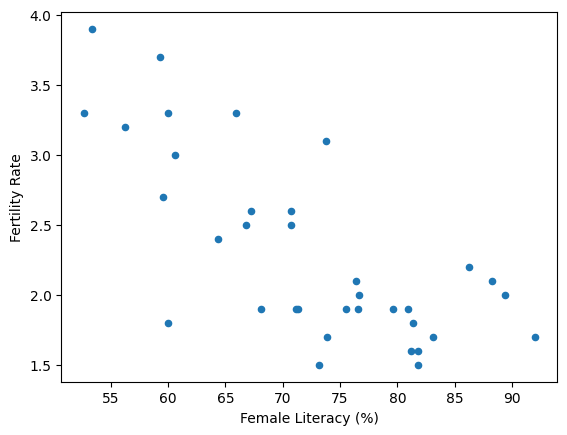

In [ ]:
df.plot.scatter('Female Literacy (%)', 'Fertility Rate')

# Reading and Writing Series and DataFrames

In [ ]:
df = pd.read_csv('ionization-energies.csv', skiprows=1, index_col=0,
                 usecols=range(5), nrows=11)
df.columns = df.columns.str.strip()
print('Second ionization energy of Li: {} eV'.format(df.loc['Li'].IE2))

Second ionization energy of Li: 75.64018 eV


In [ ]:
df.rename(columns=lambda s: s.strip(), inplace=True)

In [ ]:
import pandas as pd

def average_rda_in_micrograms(col):
    def ensure_micrograms(s):
        if s.endswith('ug'):
            return float(s[:-2])
        elif s.endswith('mg'):
            return float(s[:-2]) * 1000
        raise ValueError(f'Unrecognised units in {s}')
    fields = col.split('/')
    return sum([ensure_micrograms(s) for s in fields]) / len(fields)

df = pd.read_csv('vitamins.txt', delim_whitespace=True, skiprows=4,
                 skipfooter=1, header=None, usecols=(1, 2, 3),
                 converters={'RDA': average_rda_in_micrograms},
                 names=['Vitamin', 'Solubility', 'RDA'],
                 index_col=0
                )

<ipython-input-111-7399ec783e4c>:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('vitamins.txt', delim_whitespace=True, skiprows=4,
<ipython-input-111-7399ec783e4c>:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('vitamins.txt', delim_whitespace=True, skiprows=4,


Writing data

In [ ]:
df.to_csv('vitamins.csv', float_format ='%.1f', columns =['Solubility', 'RDA'])

In [ ]:
df = pd.read_excel('bond-lengths.xlsx',
        index_col=0,            # the first column contains the index labels
        skipfooter=2,           # ignore the last two lines of the sheet
        header=1,               # take the column names from the second row
        usecols='A:E',          # use Excel columns labeled A-E
        sheet_name='Diatomics'  # take data from this sheet
        )

print(df)

          Bond length /A    we /cm-1  wexe /cm-1  De /kJ.mol-1
Molecule                                                      
I2              2.666000   214.50000     0.61400    224.104224
O2              1.207520  1580.19000    11.98000    623.340895
Cl2             1.987000   559.70000     2.67000    350.883683
F2              1.411930   916.64000    11.23600    223.640111
N2              1.097680  2358.57000    14.32400   1161.440719
CO              1.128323  2169.81358    13.28831   1059.592595
NO              1.150770  1904.20000    14.07500    770.443043


The height of a projectile as a function of time

30     5.096805
45    10.193672
80    19.772537
dtype: float64


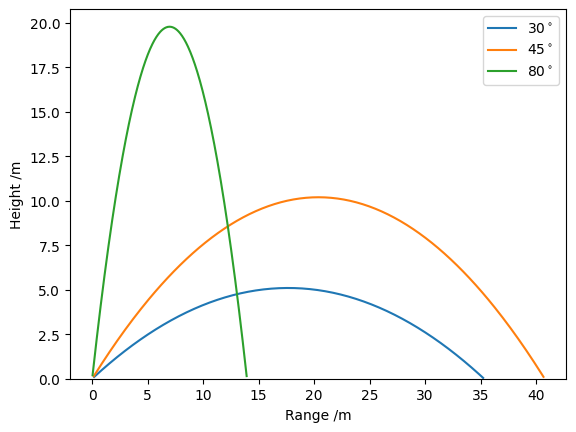

In [ ]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt

# Acceleration due to gravity , m.s -2.
g = 9.81
# Time grid , s.
t = np.linspace (0, 5, 500)
# Projectile launch angles , deg.
theta0 = np.array ([30 , 45, 80])
# Projectile launch speen , m.s -1.
v0 = 20

def z(t,v0,theta0):
  """ Return the height of the projectile at time t > 0. """
  return -g/2 * t**2 + v0*t*np.sin(theta0)

def x(t,v0,theta0):
  """ Return the range of the projectile at time t > 0. """
  return v0 * t * np.cos(theta0)

# An empty DataFrame with columns for the different launch angles.
df = pd.DataFrame(columns=theta0, index=t)

# Populate df with the projectile heights as a function of time.
for theta in theta0:
  df[theta] = z(t,v0,np.radians(theta))

# Once the projectile has landed (z <= 0), set the height data as invalid.
df[df <=0] = np.nan

# Create a Matplotlib figure with the trajectories plotted.
fig , ax = plt.subplots ()
for theta in theta0:
  ax.plot(x(t,v0,np.radians(theta)), df[theta], label=f'${theta}^\circ$')

# The maximum height obtained by the projectile for each value of theta0.
heights = df.max()
print(heights)

# Set the y-limits with a bit of padding at the top; label the axes.
ax.set_ylim (0,heights.max()*1.05)
ax. set_xlabel ('Range /m')
ax. set_ylabel ('Height /m')
ax.legend ()
plt.show ()


Web Scraping


In [ ]:
dfs = pd.read_html ('https://en.wikipedia.org/wiki/List_of_wine-producing_regions',
                      index_col =1, match="Wine production by country")
dfs[0].head ()

,Rank,Production (tonnes)
Country,,
Italy,1,5088500
France,2,3713200
Spain,3,3700588
United States,4,2057021
China,5,1814400


# More Advanced Indexing

In [ ]:
cities = ('Paris', 'Berlin', 'Vienna', 'London', 'Madrid')
months = ('Jan', 'Apr', 'Jul', 'Oct')
index = pd. MultiIndex . from_tuples ((city , month) for city in cities for month in months)
index

MultiIndex([( 'Paris', 'Jan'),
            ( 'Paris', 'Apr'),
            ( 'Paris', 'Jul'),
            ( 'Paris', 'Oct'),
            ('Berlin', 'Jan'),
            ('Berlin', 'Apr'),
            ('Berlin', 'Jul'),
            ('Berlin', 'Oct'),
            ('Vienna', 'Jan'),
            ('Vienna', 'Apr'),
            ('Vienna', 'Jul'),
            ('Vienna', 'Oct'),
            ('London', 'Jan'),
            ('London', 'Apr'),
            ('London', 'Jul'),
            ('London', 'Oct'),
            ('Madrid', 'Jan'),
            ('Madrid', 'Apr'),
            ('Madrid', 'Jul'),
            ('Madrid', 'Oct')],
           )

In [ ]:
# Mean monthly temperature (degC) for each city in each of Jan , Apr , Jul ,Oct
temps = [[4.9 , 11.5 , 20.5 , 13.0] , [0.1 , 9.0, 19.1 , 9.4] ,
         [0.3 , 10.7 , 20.8 , 10.2] , [5.2 , 9.9, 18.7 , 12.0] ,
         [6.3 , 12.9 , 25.6 , 15.1] ]
 # Mean monthly rainfall (mm) for each city in each of Jan , Apr , Jul ,Oct.
rainfall = [[51.0 , 51.8 , 62.3 , 61.5] , [37.2 , 33.7 , 52.5 , 32.2] ,
            [38. , 45., 70., 38.] , [55.2 , 43.7 , 44.5 , 68.5] ,
            [33. , 45., 12., 60.] ]
arr = np.array ((temps , rainfall )). reshape ((2, 20)).T
df = pd. DataFrame (arr , index=index , columns =['Mean temperature /degC','Mean rainfall /mm'])
df

Mean temperature /degC  Mean rainfall /mm
City   Month                                           
Paris  Jan                       4.9               51.0
       Apr                      11.5               51.8
       Jul                      20.5               62.3
       Oct                      13.0               61.5
Berlin Jan                       0.1               37.2
       Apr                       9.0               33.7
       Jul                      19.1               52.5
       Oct                       9.4               32.2
Vienna Jan                       0.3               38.0
       Apr                      10.7               45.0
       Jul                      20.8               70.0
       Oct                      10.2               38.0
London Jan                       5.2               55.2
       Apr                       9.9               43.7
       Jul                      18.7               44.5
       Oct                      12.0               68.5
Madrid Jan                       6.3               33.0
       Apr                      12.9               45.0
       Jul                      25.6               12.0
       Oct                      15.1               60.0

The loc method can be used to index into the DataFrame’s MultiIndex:

In [ ]:
df.loc['Vienna']


,Mean temperature /degC,Mean rainfall /mm
Month,,
Jan,0.3,38.0
Apr,10.7,45.0
Jul,20.8,70.0
Oct,10.2,38.0


In [ ]:
df.loc [('Paris', 'Jul')]

,Paris
,Jul
Mean temperature /degC,20.5
Mean rainfall /mm,62.3


In [ ]:
df.loc [('Paris', 'Jul'), 'Mean rainfall /mm']

62.3

To slice a MultiIndex, however, it must first be sorted

In [ ]:
df['Berlin':'London'] # this will not work because it is not sorted

UnsortedIndexError: 'Key length (1) was greater than MultiIndex lexsort depth (0)'

In [ ]:
df. sort_index (inplace=True)
df['Berlin':'London']

Mean temperature /degC  Mean rainfall /mm
City   Month                                           
Berlin Apr                       9.0               33.7
       Jan                       0.1               37.2
       Jul                      19.1               52.5
       Oct                       9.4               32.2
London Apr                       9.9               43.7
       Jan                       5.2               55.2
       Jul                      18.7               44.5
       Oct                      12.0               68.5

Note that this has sorted the months into alphabetical order as well. To keep them in
chronological order, one approach would be to number the months instead by relabeling
the index:

In [ ]:
df2 = df.rename ({'Jan': 1, 'Apr': 4, 'Jul': 7, 'Oct': 10})
df2. sort_index (inplace=True)
df2.loc['Vienna', 'Mean temperature /degC']

,Mean temperature /degC
Month,
1,0.3
4,10.7
7,20.8
10,10.2


to retrieve the climate
data for January in all cities:

In [ ]:
df.xs('Jan', level =1) # look in second level of the MultiIndex for ' Jan '

,Mean temperature /degC,Mean rainfall /mm
City,,
Berlin,0.1,37.2
London,5.2,55.2
Madrid,6.3,33.0
Paris,4.9,51.0
Vienna,0.3,38.0


In [ ]:
df.unstack ()

Mean temperature /degC                  Mean rainfall /mm              \
Month                     Apr  Jan   Jul   Oct               Apr   Jan   Jul   
City                                                                           
Berlin                    9.0  0.1  19.1   9.4              33.7  37.2  52.5   
London                    9.9  5.2  18.7  12.0              43.7  55.2  44.5   
Madrid                   12.9  6.3  25.6  15.1              45.0  33.0  12.0   
Paris                    11.5  4.9  20.5  13.0              51.8  51.0  62.3   
Vienna                   10.7  0.3  20.8  10.2              45.0  38.0  70.0   

              
Month    Oct  
City          
Berlin  32.2  
London  68.5  
Madrid  60.0  
Paris   61.5  
Vienna  38.0

 Timestamps and Time Series

In [ ]:
pd. to_datetime ('9:05 21 August 2017')

Timestamp('2017-08-21 09:05:00')

In [ ]:
pd. to_datetime ('21 August 2017 09:05:23')

Timestamp('2017-08-21 09:05:23')

In [ ]:
pd. date_range ('1997 -03 -12', '1997 -03 -15')

DatetimeIndex(['1997-03-12', '1997-03-13', '1997-03-14', '1997-03-15'], dtype='datetime64[ns]', freq='D')

In [ ]:
pd. date_range ('1997 -03 -12', periods =4)

DatetimeIndex(['1997-03-12', '1997-03-13', '1997-03-14', '1997-03-15'], dtype='datetime64[ns]', freq='D')

In [ ]:
pd. date_range ('1997 -03', periods =4, freq='M') #M means Monthend

<ipython-input-20-7e7206ee4a85>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd. date_range ('1997 -03', periods =4, freq='M')


DatetimeIndex(['1997-03-31', '1997-04-30', '1997-05-31', '1997-06-30'], dtype='datetime64[ns]', freq='ME')

In [ ]:
pd. date_range ('1997 -03', periods =4, freq='MS') #MS means Monthstart

DatetimeIndex(['1997-03-01', '1997-04-01', '1997-05-01', '1997-06-01'], dtype='datetime64[ns]', freq='MS')

In [ ]:
p = pd.Period('2020 -04', freq='M')
t = pd. Timestamp ('2020 -04 -03 14:30')
p. start_time < t < p.end_time

True

<ipython-input-24-8aa4113d0efb>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rs_monthly = df. resample ('M')


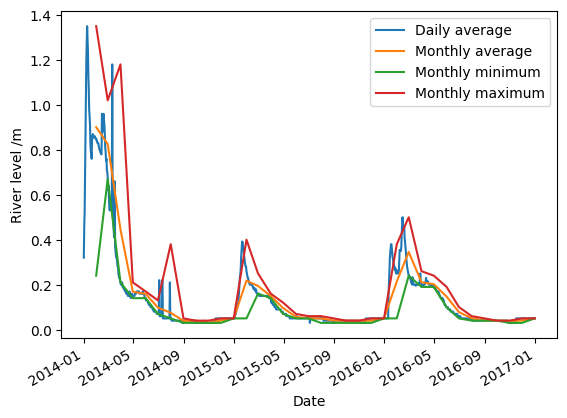

In [ ]:
import pandas as pd
import matplotlib .pyplot as plt

df = pd.read_csv ('river-level.csv', index_col =0, comment='#', parse_dates =True)
rs_monthly = df. resample ('M')

df['avg_level']. plot(label='Daily average')
rs_monthly ['avg_level']. mean (). plot(label='Monthly average')
rs_monthly ['min_level'].min(). plot(label='Monthly minimum')
rs_monthly ['max_level'].max(). plot(label='Monthly maximum')
plt.xlabel('Date')

plt.ylabel('River level /m')
plt.gca (). legend ()
plt.show ()

# Data Cleaning and Exploration

Missing Values

In [ ]:
df = pd. DataFrame ([[ 1.1, np.nan , np.nan , 10.3] ,
                     [ 0.8, np.nan , 3.6, 2.9] ,
                     [ 1.2, 2.5, 1.6, 2.7] ,
                     [np.nan , np.nan , np.nan , np.nan],
                     [np.nan , np.nan , 3.6, 5.3]] ,
                     columns=list('ABCD'))
df

,A,B,C,D
0,1.1,NaN,NaN,10.3
1,0.8,NaN,3.6,2.9
2,1.2,2.5,1.6,2.7
3,NaN,NaN,NaN,NaN
4,NaN,NaN,3.6,5.3


method dropna(), which returns a new DataFrame with rows
containing only non-null data

In [ ]:
df.dropna ()

,A,B,C,D
2,1.2,2.5,1.6,2.7


 to drop only rows (or columns) which consist entirely of NaN. In that
case, pass the argument how='all'

In [ ]:
df.dropna(how='all')

,A,B,C,D
0,1.1,NaN,NaN,10.3
1,0.8,NaN,3.6,2.9
2,1.2,2.5,1.6,2.7
4,NaN,NaN,3.6,5.3


In [ ]:
 df.dropna(thresh =3, axis =1) # only drop columns with three or more NaNs

,A,C,D
0,1.1,NaN,10.3
1,0.8,3.6,2.9
2,1.2,1.6,2.7
3,NaN,NaN,NaN
4,NaN,3.6,5.3


Replace all NaN values with a single value:


In [ ]:
df.fillna (3.6)

,A,B,C,D
0,1.1,3.6,3.6,10.3
1,0.8,3.6,3.6,2.9
2,1.2,2.5,1.6,2.7
3,3.6,3.6,3.6,3.6
4,3.6,3.6,3.6,5.3


Replace NaN values with the last encountered valid value down the columns (“fill
forward”)

In [ ]:
df.fillna(method='ffill')

<ipython-input-31-5c0beae7dc1e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')


,A,B,C,D
0,1.1,NaN,NaN,10.3
1,0.8,NaN,3.6,2.9
2,1.2,2.5,1.6,2.7
3,1.2,2.5,1.6,2.7
4,1.2,2.5,3.6,5.3


Replace NaN values with the last encountered valid value along the rows:


In [ ]:
df.fillna(method='ffill', axis =1)

<ipython-input-32-2438219bd49e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', axis =1)


,A,B,C,D
0,1.1,1.1,1.1,10.3
1,0.8,0.8,3.6,2.9
2,1.2,2.5,1.6,2.7
3,NaN,NaN,NaN,NaN
4,NaN,NaN,3.6,5.3


to fill in the missing data in columns A and C with their means:


In [ ]:
df.fillna ({'A': df['A']. mean (), 'C': df['C']. mean ()})

,A,B,C,D
0,1.100000,NaN,2.933333,10.3
1,0.800000,NaN,3.600000,2.9
2,1.200000,2.5,1.600000,2.7
3,1.033333,NaN,2.933333,NaN
4,1.033333,NaN,3.600000,5.3


In [ ]:
df.fillna ({'A': df['A']. mean (), 'B': df['B']. mean ()}). fillna (0)

,A,B,C,D
0,1.100000,2.5,0.0,10.3
1,0.800000,2.5,3.6,2.9
2,1.200000,2.5,1.6,2.7
3,1.033333,2.5,0.0,0.0
4,1.033333,2.5,3.6,5.3


In [ ]:
ser = pd.Series ([1.2 , 3.5, -99, -99, 4.0, -99, -0.5])
ser.replace (-99, np.nan)

,0
0,1.2
1,3.5
2,NaN
3,NaN
4,4.0
5,NaN
6,-0.5


replace can also take a dictionary mapping values to their replacements:

In [ ]:
ser.replace ({ -99: 0, -0.5: np.nan })


,0
0,1.2
1,3.5
2,0.0
3,0.0
4,4.0
5,0.0
6,NaN


 Duplicate Values

In [ ]:
 df = pd. DataFrame ([['Lithium', 'Li', 3, 6, 0.0759] ,
                      ['Lithium', 'Li', 3, 7, 0.9241] ,
                       ['Sodium', 'Na', 11, 23, 1],
                        ['Potassium', 'K', 19, 39, 0.932581] ,
                         ['Potassium', 'K', 19, 40, 1.17e-4],
                          ['Potassium', 'K', 19, 41, 0.067302]] ,
                     columns =['Element', 'Symbol', 'Z', 'A', 'Abundance'])
 df

,Element,Symbol,Z,A,Abundance
0,Lithium,Li,3,6,0.075900
1,Lithium,Li,3,7,0.924100
2,Sodium,Na,11,23,1.000000
3,Potassium,K,19,39,0.932581
4,Potassium,K,19,40,0.000117
5,Potassium,K,19,41,0.067302


In [ ]:
df. drop_duplicates (['Symbol'])

,Element,Symbol,Z,A,Abundance
0,Lithium,Li,3,6,0.075900
2,Sodium,Na,11,23,1.000000
3,Potassium,K,19,39,0.932581


In [ ]:
df. drop_duplicates (['Symbol', 'Z'], keep='last')

,Element,Symbol,Z,A,Abundance
1,Lithium,Li,3,7,0.924100
2,Sodium,Na,11,23,1.000000
5,Potassium,K,19,41,0.067302


Binning Data

In [ ]:
marks = [67, 80, 34, 55, 77, 66, 59, 52, 70, 67, 58, 63, 49, 72]
bins = [0, 40, 60, 70, 80, 100]
dist = pd.cut(marks , bins)
dist

[(60, 70], (70, 80], (0, 40], (40, 60], (70, 80], ..., (60, 70], (40, 60], (60, 70], (40, 60], (70, 80]]
Length: 14
Categories (5, interval[int64, right]): [(0, 40] < (40, 60] < (60, 70] < (70, 80] < (80, 100]]

In [ ]:
pd. value_counts (dist)

<ipython-input-41-10297b3e5785>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd. value_counts (dist)


,count
"(40, 60]",5
"(60, 70]",5
"(70, 80]",3
"(0, 40]",1
"(80, 100]",0


By default, the right side of each interval is closed and the left side is open; this can be
swapped by setting the argument right=False:

In [ ]:
pd. value_counts (pd.cut(marks , bins , right=False ))

<ipython-input-42-91461edce970>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd. value_counts (pd.cut(marks , bins , right=False ))


,count
"[40, 60)",5
"[60, 70)",4
"[70, 80)",3
"[0, 40)",1
"[80, 100)",1


The bins can also be named by passing a sequence of strings to the labels argument

In [ ]:
dist = pd.cut(marks , bins , labels=list(reversed('ABCDE')), right=False)
dist

['C', 'A', 'E', 'D', 'B', ..., 'C', 'D', 'C', 'D', 'B']
Length: 14
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [ ]:
pd. value_counts (dist)

<ipython-input-44-10297b3e5785>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd. value_counts (dist)


,count
D,5
C,4
B,3
E,1
A,1


To put the counts in order of
decreasing grade, we can sort the Series index:

In [ ]:
pd. value_counts (dist ). sort_index ( ascending =False)

<ipython-input-45-08e29631cdb9>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd. value_counts (dist ). sort_index ( ascending =False)


,count
A,1
B,3
C,4
D,5
E,1


### Dealing with Outliers

For example, consider a simulated village in which the 200 houses have normallydistributed prices (µ = $250 000, σ = $55 000), with the exception of a couple of mansions worth many times more than the average home:

In [ ]:
nhouses = 200
mu , sigma = 250, 55 # mean , standard deviation in $1000s
prices = np.clip(np.random.randn(nhouses )* sigma + mu , 0, None ). astype(int)
prices [-2] = 1.e3
prices [-1] = 2.e3
df = pd. DataFrame (prices , columns =['price , $1000s'])
df.tail ()

,"price , $1000s"
195,252
196,190
197,327
198,1000
199,2000


In [ ]:
 df.median ()

,0
"price , $1000s",256.0


In [ ]:
df.mean ()

,0
"price , $1000s",261.255


In [ ]:
df.std ()

,0
"price , $1000s",146.178696


In [ ]:
df[df > 3*df.std ()+ df.mean ()] = np.nan
df.tail ()

,"price , $1000s"
195,252.0
196,190.0
197,327.0
198,NaN
199,NaN


In [ ]:
df.mean ()

,0
"price , $1000s",247.812183


In [ ]:
df.std ()

,0
"price , $1000s",56.176746


Example : Robert Millikan’s famous oil-drop experiments were carried out at
the University of Chicago from 1909 to determine the magnitude of the charge of the
electron.
12 In a single experiment, an electrically charged oil droplet was observed to
fall a known distance, d, between two uncharged plates at its terminal velocity, vg: from
the time taken, tg, the droplet’s radius, a, can be deduced. Next, a voltage was applied
to the plates, inducing an electric field between them. As the droplet rises under the
resulting net force, the time taken, te, for it to move back up through the same distance,
d, can be used to deduce its total charge, q, which is observed to be an integer multiple
of the same base value, e, that is: q = Ne.

In [ ]:
eta = 1.859e-5                  # air viscosity, kg.m-1.s-1
rho_air = 1.17                  # air density, kg.m-3
rho_oil = 917.3                 # oil density, kg.m-3
rhop = rho_oil - rho_air
g = 9.803                       # acceleration due to gravity, m.s-2
d = 11.09e-3                    # rise/fall distance, m
E = -322.1e3

In [ ]:
import pandas as pd
df = pd.read_csv('eg10-millikan-data.txt', delim_whitespace=True,
                         index_col=[0, 1])
df.head()

<ipython-input-56-081cb3f39600>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('eg10-millikan-data.txt', delim_whitespace=True,


tg      te    tg.1    te.1    tg.2    te.2
drop expt                                                
A    1     13.102  46.822  12.941  46.896  13.086  46.681
     2     12.938  86.767  13.032  86.952  13.086  86.746
     3     13.023  61.082  12.958  60.826  12.998  60.860
     4     12.943  86.747  12.922  86.840  13.054  86.899
B    1     11.434  56.305  11.350  56.097  11.246  56.282

In [ ]:
dropA = df.loc['A'].T
dropA

expt,1,2,3,4
tg,13.102,12.938,13.023,12.943
te,46.822,86.767,61.082,86.747
tg.1,12.941,13.032,12.958,12.922
te.1,46.896,86.952,60.826,86.840
tg.2,13.086,13.086,12.998,13.054
te.2,46.681,86.746,60.860,86.899


In [ ]:
dropA.index = dropA.index.str.slice(0, 2)
dropA

expt,1,2,3,4
tg,13.102,12.938,13.023,12.943
te,46.822,86.767,61.082,86.747
tg,12.941,13.032,12.958,12.922
te,46.896,86.952,60.826,86.840
tg,13.086,13.086,12.998,13.054
te,46.681,86.746,60.860,86.899


In [ ]:
tg = dropA.loc['tg'].values.mean()
te = dropA.loc['te'].mean()
tg

13.006916666666667

In [ ]:
te

,0
expt,
1,46.799667
2,86.821667
3,60.922667
4,86.828667


In [ ]:
a = np.sqrt(9*eta*d/tg/2/rhop/g)
a

2.8181654881967875e-06

In [ ]:
q = 6 * np.pi * eta * a * d / E * (1/tg + 1/te)
q

,0
expt,
1,-3.340563e-18
2,-3.005663e-18
3,-3.172143e-18
4,-3.005631e-18


In [ ]:
for drop in df.index.levels[0]:
    drop_df = df.loc[drop].T
    drop_df.index = drop_df.index.str.slice(0, 2)
    tg = drop_df.loc['tg'].values.mean()
    te = drop_df.loc['te'].mean()
    a = np.sqrt(9*eta*d/tg/2/rhop/g)
    q = 6 * np.pi * eta * a * d / E * (1/tg + 1/te)
    df.loc[drop, 'q'] = q.values

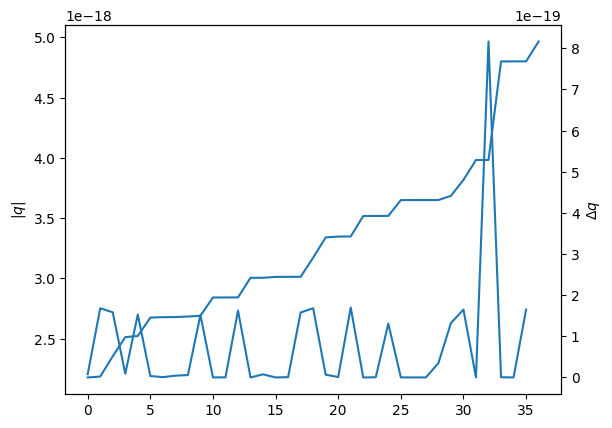

In [ ]:
sorted_q = sorted(-df.loc[:, 'q'])
plt.plot(sorted_q)
plt.ylabel('$|q|$')
plt.twinx()
dq = np.diff(sorted_q)
plt.plot(dq)
plt.ylabel(r'$\Delta q$')
plt.show()

In [ ]:
e_estimate = dq[(dq>1.e-19) & (dq<2.e-19)].mean()
e_estimate

1.5697150510604626e-19

In [ ]:
df['N'] = (df['q'] / e_estimate).astype(int)

In [ ]:
(df['q']/df['N']).mean()

1.5923552150386455e-19

#  Data Grouping and Aggregation

Example : Consider the following table of the yields of three compounds, A, B
and C, attained in a synthesis experiment by three students, Anu, Jenny and Tom.

In [ ]:
data = [['Anu', 'A', 5.4] , ['Anu', 'B', 6.7] , ['Anu', 'C', 10.1] ,
        ['Jenny', 'A', 6.5] , ['Jenny', 'B', 5.9] , ['Jenny', 'C', 12.2] ,
        ['Tom', 'A', 4.0] , ['Tom', 'B', None], ['Tom', 'C', 9.5]
        ]
df = pd. DataFrame (data , columns =['Student', 'Compound', 'Yield /g'])
print(df)

  Student Compound  Yield /g
0     Anu        A       5.4
1     Anu        B       6.7
2     Anu        C      10.1
3   Jenny        A       6.5
4   Jenny        B       5.9
5   Jenny        C      12.2
6     Tom        A       4.0
7     Tom        B       NaN
8     Tom        C       9.5


In [ ]:
grouped = df.groupby('Compound')

In [ ]:
grouped.max ()

,Student,Yield /g
Compound,,
A,Tom,6.5
B,Tom,6.7
C,Tom,12.2


In [ ]:
grouped['Yield /g'].min()


,Yield /g
Compound,
A,4.0
B,5.9
C,9.5


The object returned by groupby() can be iterated over:

In [ ]:
for compound,group in grouped:
  print('Compound:', compound )
  print(group)


Compound: A
  Student Compound  Yield /g
0     Anu        A       5.4
3   Jenny        A       6.5
6     Tom        A       4.0
Compound: B
  Student Compound  Yield /g
1     Anu        B       6.7
4   Jenny        B       5.9
7     Tom        B       NaN
Compound: C
  Student Compound  Yield /g
2     Anu        C      10.1
5   Jenny        C      12.2
8     Tom        C       9.5


We can also group by the 'Student' column:

In [ ]:
grouped = df.groupby('Student')

In [ ]:
degree_programmes = {'Anu': 'Chemistry',
'Jenny': 'Chemistry',
'Tom': 'Pharmacology'}

# Examples

The following examples demonstrate the practical use of pandas in two case studies
involving the analysis and visualization of real data.


In [ ]:
import pandas as pd
from datetime import datetime
df = pd.read_csv('nuclear-explosion-data.csv')
df.head()

,date,time,id,country,region,source,lat,long,mb,Ms,depth,yield_lower,yield_upper,purpose,name,type
0,19450716,123000.0,45001,USA,ALAMOGORDO,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,WR,TRINITY,TOWER
1,19450805,231500.0,45002,USA,HIROSHIMA,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,COMBAT,LITTLEBOY,AIRDROP
2,19450809,15800.0,45003,USA,NAGASAKI,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,COMBAT,FATMAN,AIRDROP
3,19460630,220100.0,46001,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,WE,ABLE,AIRDROP
4,19460724,213500.0,46002,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,WE,BAKER,UW


In [ ]:
df.index

RangeIndex(start=0, stop=2051, step=1)

In [ ]:
df.columns

Index(['date', 'time', 'id', 'country', 'region', 'source', 'lat', 'long',
       'mb', 'Ms', 'depth', 'yield_lower', 'yield_upper', 'purpose', 'name',
       'type'],
      dtype='object')

It is natural to assign the date and time of the explosion to the DataFrame index. Some helper functions facilitate this:

In [ ]:
def parse_time(t):
    hour, t = divmod(t, 10000)
    minute, t = divmod(t, 100)
    return int(hour), int(minute), int(t)

def parse_datetime(date, time):
    date_and_time = datetime.strptime(str(date), '%Y%m%d')
    hour, minute, second = parse_time(time)
    return date_and_time.replace(hour=hour, minute=minute, second=second)

df.index = pd.DatetimeIndex([parse_datetime(date, time) for date, time in
                    zip(df['date'], df['time'])])

We can plot the number of explosions in each year by grouping on index.year and finding the size of each group; a regular Matplotlib bar chart can then be produced:

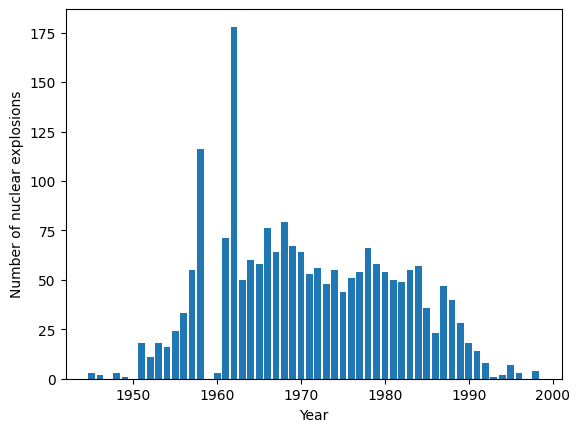

In [ ]:
explosion_number = df.groupby(df.index.year).size()

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(explosion_number.index, explosion_number.values)
ax.set_xlabel('Year')
ax.set_ylabel('Number of nuclear explosions')
plt.show()

A stacked bar chart can break down the annual count of explosions by country. First, group by both year and country and get the explosion counts for this grouping with size():

In [ ]:
df2 = df.groupby([df.index.year, df.country])
explosions_by_country = df2.size()
print(explosions_by_country.head(7))

      country
1945  USA         3
1946  USA         2
1948  USA         3
1949  USSR        1
1951  USA        16
      USSR        2
1952  UK          1
dtype: int64


Next, unstack the second index into columns, filling the empty entries with zeros

In [ ]:
explosions_by_country = explosions_by_country.unstack().fillna(0)
print(explosions_by_country.head(7))

country  CHINA  FRANCE  INDIA  PAKISTAN   UK   USA  USSR
1945       0.0     0.0    0.0       0.0  0.0   3.0   0.0
1946       0.0     0.0    0.0       0.0  0.0   2.0   0.0
1948       0.0     0.0    0.0       0.0  0.0   3.0   0.0
1949       0.0     0.0    0.0       0.0  0.0   0.0   1.0
1951       0.0     0.0    0.0       0.0  0.0  16.0   2.0
1952       0.0     0.0    0.0       0.0  1.0  10.0   0.0
1953       0.0     0.0    0.0       0.0  2.0  11.0   5.0


Each row in this DataFrame can then be plotted as stacked bars on a Matplotlib chart:

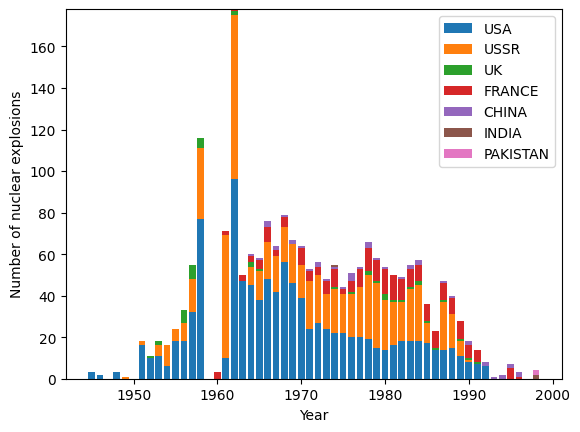

In [ ]:
countries = ['USA', 'USSR', 'UK', 'FRANCE', 'CHINA', 'INDIA', 'PAKISTAN']
bottom = np.zeros(len(explosions_by_country))
fig, ax = plt.subplots()
for country in countries:
    ax.bar(explosions_by_country.index, explosions_by_country[country],
            bottom=bottom, label=country)
    bottom += explosions_by_country[country].values

ax.set_xlabel('Year')
ax.set_ylabel('Number of nuclear explosions')
ax.legend()
plt.show()

Example 2

In [ ]:
df = pd.read_csv('volcanic-eruptions.csv', index_col=0)

In [ ]:
df.loc[df['Deaths'].idxmax()]

,25
Year,450
Month,NaN
Day,NaN
Name,Ilopango
Location,El Salvador
Country,El Salvador
Latitude,13.672
Longitude,-89.053
Elevation,450
Type,Caldera


In [ ]:
def get_date(year, month, day):
    if year < 0:
       s_year = f'{-year} BCE'
    else:
       s_year = str(year)
    if pd.isnull(month):
       return s_year
    s_date = f'{int(month)}/{s_year}'
    if pd.isnull(day):
       return s_date
    return f'{int(day)}/{s_date}'

In [ ]:
df['date'] = [get_date(year, month, day) for year, month, day in
                                    zip(df['Year'], df['Month'], df['Day'])]

In [ ]:
df[(df['VEI'] >= 6) & (df['Year'] >= 1800)]

,Year,Month,Day,Name,Location,Country,Latitude,Longitude,Elevation,Type,VEI,Deaths,date
218,1815,4.0,10.0,Tambora,Lesser Sunda Is,Indonesia,-8.250,118.000,2850,Stratovolcano,7.0,11000.0,10/4/1815
322,1883,8.0,27.0,Krakatau,Indonesia,Indonesia,-6.102,105.423,813,Caldera,6.0,2000.0,27/8/1883
365,1902,10.0,25.0,Santa Maria,Guatemala,Guatemala,14.756,-91.552,3772,Stratovolcano,6.0,2500.0,25/10/1902
386,1912,9.0,6.0,Novarupta,Alaska Peninsula,United States,58.270,-155.160,841,Caldera,6.0,2.0,6/9/1912
650,1991,6.0,15.0,Pinatubo,Luzon-Philippines,Philippines,15.130,120.350,1486,Stratovolcano,6.0,350.0,15/6/1991


In [ ]:
df[pd.notnull(df['VEI'])].sort_values('VEI').tail(10)[
                 ['date', 'Name', 'Type', 'Country', 'VEI']]

,date,Name,Type,Country,VEI
29,653,Dakataua,Caldera,Papua New Guinea,6.0
25,450,Ilopango,Caldera,El Salvador,6.0
22,240,Ksudach,Stratovolcano,Russia,6.0
21,230,Taupo,Caldera,New Zealand,6.0
18,60,Bona-Churchill,Stratovolcano,United States,6.0
99,19/2/1600,Huaynaputina,Stratovolcano,Peru,6.0
1,1750 BCE,Veniaminof,Stratovolcano,United States,6.0
40,1000,Changbaishan,Stratovolcano,North Korea,7.0
218,10/4/1815,Tambora,Stratovolcano,Indonesia,7.0
3,1610 BCE,Santorini,Shield volcano,Greece,7.0


In [ ]:
df.sort_values(['VEI', 'Deaths'], na_position='first').tail(10)[
                ['date', 'Name', 'Type', 'Country', 'VEI', 'Deaths']]

,date,Name,Type,Country,VEI,Deaths
386,6/9/1912,Novarupta,Caldera,United States,6.0,2.0
650,15/6/1991,Pinatubo,Stratovolcano,Philippines,6.0,350.0
99,19/2/1600,Huaynaputina,Stratovolcano,Peru,6.0,1500.0
120,1660,Long Island,Complex volcano,Papua New Guinea,6.0,2000.0
322,27/8/1883,Krakatau,Caldera,Indonesia,6.0,2000.0
365,25/10/1902,Santa Maria,Stratovolcano,Guatemala,6.0,2500.0
25,450,Ilopango,Caldera,El Salvador,6.0,30000.0
3,1610 BCE,Santorini,Shield volcano,Greece,7.0,NaN
40,1000,Changbaishan,Stratovolcano,North Korea,7.0,NaN
218,10/4/1815,Tambora,Stratovolcano,Indonesia,7.0,11000.0


We can also plot some histograms summarizing the data:

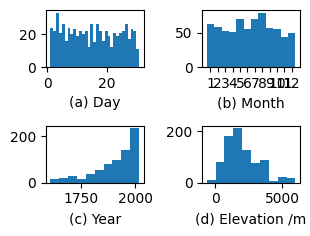

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(3.2, 2.46))
df['Day'].hist(bins=31, ax=axes[0][0], grid=False)
axes[0][0].set_xlabel('(a) Day')
df['Month'].hist(bins=np.arange(1, 14) - 0.5, ax=axes[0][1], grid=False)
axes[0][1].set_xticks(range(1, 13))
axes[0][1].set_xlabel('(b) Month')
df[df['Year']>1600]['Year'].hist(ax=axes[1][0], grid=False)
axes[1][0].set_xlabel('(c) Year')
df['Elevation'].hist(ax=axes[1][1], grid=False)
axes[1][1].set_xlabel('(d) Elevation /m')
plt.tight_layout()
plt.show()